In [120]:
#Import the libraries
import math
# import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [125]:
df = pd.read_csv("crypto_data/LTC-USD.csv", names=['time', 'low', 'high', 'open', 'close', 'volume'])

In [126]:
df = df[::20]
df.shape

(5095, 6)

In [127]:
def zamianka(row):
    row = datetime.fromtimestamp(row)
    return row

In [128]:
df['time'] = df['time'].apply(zamianka)
df

,time,low,high,open,close,volume
0,2018-06-14 11:31:00,96.580002,96.589996,96.589996,96.580002,9.647200
20,2018-06-14 11:51:00,96.510002,96.660004,96.599998,96.529999,35.262199
40,2018-06-14 12:11:00,96.809998,96.820000,96.820000,96.820000,52.158798
60,2018-06-14 12:31:00,96.559998,96.690002,96.559998,96.690002,160.196899
80,2018-06-14 12:51:00,96.809998,96.809998,96.809998,96.809998,14.883700
...,...,...,...,...,...,...
101800,2018-08-25 17:19:00,58.119999,58.130001,58.119999,58.130001,30.490561
101820,2018-08-25 17:39:00,58.250000,58.259998,58.259998,58.259998,63.709370
101840,2018-08-25 17:59:00,58.160000,58.169998,58.160000,58.160000,7.473397
101860,2018-08-25 18:19:00,58.009998,58.020000,58.020000,58.009998,19.292011


In [129]:
df.set_index('time', inplace=True)
df

,low,high,open,close,volume
time,,,,,
2018-06-14 11:31:00,96.580002,96.589996,96.589996,96.580002,9.647200
2018-06-14 11:51:00,96.510002,96.660004,96.599998,96.529999,35.262199
2018-06-14 12:11:00,96.809998,96.820000,96.820000,96.820000,52.158798
2018-06-14 12:31:00,96.559998,96.690002,96.559998,96.690002,160.196899
2018-06-14 12:51:00,96.809998,96.809998,96.809998,96.809998,14.883700
...,...,...,...,...,...
2018-08-25 17:19:00,58.119999,58.130001,58.119999,58.130001,30.490561
2018-08-25 17:39:00,58.250000,58.259998,58.259998,58.259998,63.709370
2018-08-25 17:59:00,58.160000,58.169998,58.160000,58.160000,7.473397


In [130]:
df.shape

(5095, 5)

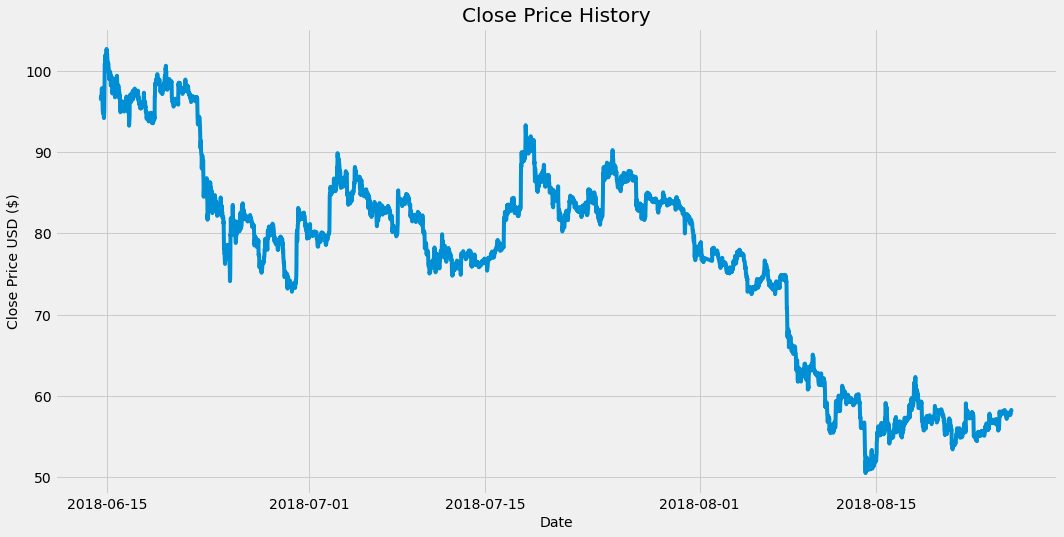

In [131]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])  # series object
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [81]:
# Creating new df with only 'close' column

In [132]:
data = df.filter(['close'])

In [133]:
# for our model we need the data to be in np array (best)
dataset = data.values

In [134]:
# Get the number of rows to train the model on
training_data_len = np.round(len(dataset) * .8)
training_data_len

4076.0

In [135]:
# Scaling the data (normalization)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.88280361],
       [0.88184607],
       [0.88739951],
       ...,
       [0.1470701 ],
       [0.1441976 ],
       [0.14438913]])

In [136]:
# Creating training dataset
train_data = scaled_data[:df.shape[0]]

# Split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [137]:
x_train

[array([[0.88280361],
        [0.88184607],
        [0.88739951],
        [0.88491009],
        [0.88720798],
        [0.88644197],
        [0.89869795],
        [0.90731528],
        [0.8994638 ],
        [0.90022981],
        [0.89218695],
        [0.86997332],
        [0.85522791],
        [0.85120648],
        [0.84795106],
        [0.85407898],
        [0.85810041],
        [0.8594409 ],
        [0.84297209],
        [0.8370357 ],
        [0.84986602],
        [0.85580239],
        [0.90654927],
        [0.9459977 ],
        [0.96572208],
        [0.95021066],
        [0.98487183],
        [0.97319046],
        [0.97414785],
        [0.9707009 ],
        [0.966105  ],
        [0.96821149],
        [0.9689775 ],
        [0.98448874],
        [1.        ],
        [0.98104178],
        [0.98180779],
        [0.98831863],
        [0.97893529],
        [0.97606281],
        [0.95538119],
        [0.95997709],
        [0.94733818],
        [0.96706254],
        [0.96304098],
        [0

In [138]:
# COnvert lists to np arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data, cuz LSTM expects the input to be 3D
# Its already in 3D, checked that already

In [139]:
# x_train.shape

(5035, 60, 1)

In [140]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

In [142]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [144]:
# Train
model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=2)

Train on 5035 samples
5035/5035 - 24s - loss: 7.9342e-04


In [151]:
# Test data set
training_data_len = int(training_data_len)
test_data = scaled_data[training_data_len - 60:]
# Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len:, :]  # Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [153]:
x_test = np.array(x_test)

In [155]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [157]:
x_test.shape  # now 3D :)

(1019, 60, 1)

In [158]:
predictions = model.predict(x_test)

In [160]:
predictions = scaler.inverse_transform(predictions)  # unscaling !

In [162]:
predictions

array([[56.299347],
       [56.363842],
       [56.346416],
       ...,
       [58.185257],
       [58.24619 ],
       [58.235302]], dtype=float32)

In [164]:
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.5211270059935253

C:\Users\jozee\anaconda3\envs\gputen\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


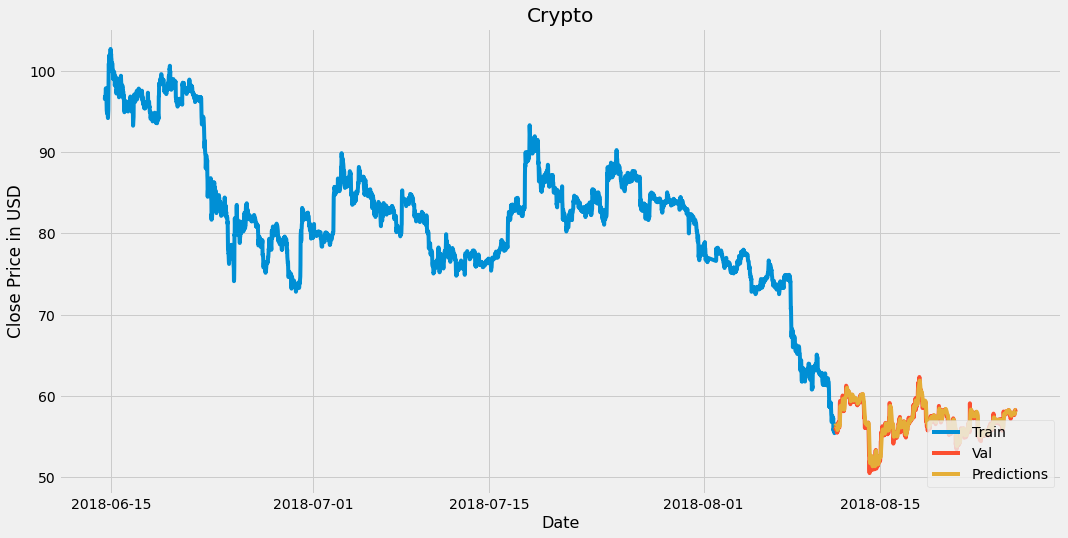

In [169]:
# Plotting the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Crypto')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price in USD')
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('crypto_pred_2018.png')
plt.show()

<Figure size 432x288 with 0 Axes>